In [15]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit 

# Please, to run the experiment donwload the following dataset and put it in the /Dataset folder:
# 	- kc_house_data.csv
#       https://www.kaggle.com/harlfoxem/housesalesprediction

filename = "Datasets/kc_house_data.csv"
df = pd.read_csv(filename, header=0) 
df = df.dropna()

print(list(df.columns.values) )

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [16]:
x = df[['bedrooms','sqft_living','sqft_lot','floors', 'sqft_above','sqft_basement','yr_built']]
x = x.to_numpy()
y = df['price']
y = y.to_numpy()
n = x.shape[1]

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(21613, 7)
(21613, 44)
(21613, 36)


In [18]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  0
time =  65.4216189999488 ms
mean time =  65.4216189999488 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  1
time =  50.14499799995065 ms
mean time =  57.783308499949726 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  2
time =  42.3520470000085 ms
mean time =  52.63955466663598 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  3
time =  44.10030099995765 ms
mean time =  50.5047412499664 ms
ERROR: singular cone basis
Using determiinistic Algorithm


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


ERROR: singular cone basis
Using determiinistic Algorithm
sample =  4
time =  53.814403000046696 ms
mean time =  51.16667359998246 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  5
time =  49.16056899992327 ms
mean time =  50.83232283330593 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  6
time =  42.4867340000219 ms
mean time =  49.640095857122496 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  7
time =  47.15961299996252 ms
mean time =  49.3300354999775 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  8
time =  47.44776500001535 ms
mean time =  49.120894333315036 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinis

In [19]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

sample =  0
time =  46.708228000056806 ms
mean time =  46.708228000056806 ms
sample =  1
time =  38.871854000035455 ms
mean time =  42.79004100004613 ms
sample =  2
time =  46.41280500004541 ms
mean time =  43.99762900004589 ms
sample =  3
time =  37.81379899999138 ms
mean time =  42.45167150003226 ms
sample =  4
time =  40.22962600004121 ms
mean time =  42.00726240003405 ms
sample =  5
time =  42.6526419998936 ms
mean time =  42.11482566667731 ms
sample =  6
time =  49.93645499996546 ms
mean time =  43.232201285718475 ms
sample =  7
time =  42.813007999939146 ms
mean time =  43.17980212499606 ms
sample =  8
time =  36.399377000066124 ms
mean time =  42.4264215555594 ms
sample =  9
time =  36.49351800004297 ms
mean time =  41.833131200007756 ms
sample =  10
time =  42.643310000016754 ms
mean time =  41.90678381819039 ms
sample =  11
time =  38.7132969999584 ms
mean time =  41.64065991667106 ms
sample =  12
time =  38.47080900004585 ms
mean time =  41.39682523077681 ms
sample =  13
time

In [20]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  129.57405999998173 ms
mean time =  129.57405999998173 ms
sample =  1
time =  130.218689000003 ms
mean time =  129.89637449999236 ms
sample =  2
time =  127.17460700002903 ms
mean time =  128.98911866667126 ms
sample =  3
time =  129.06024099993374 ms
mean time =  129.00689924998687 ms
sample =  4
time =  127.18152699994789 ms
mean time =  128.64182479997908 ms
sample =  5
time =  126.2622320000446 ms
mean time =  128.24522599999 ms
sample =  6
time =  123.4983370000009 ms
mean time =  127.56709899999156 ms
sample =  7
time =  126.97643299998163 ms
mean time =  127.49326574999031 ms
sample =  8
time =  126.44568899997921 ms
mean time =  127.37686833332242 ms
sample =  9
time =  121.85861500006467 ms
mean time =  126.82504299999664 ms
sample =  10
time =  124.53260699999191 ms
mean time =  126.61663972726893 ms
sample =  11
time =  125.51315700000032 ms
mean time =  126.52468283332989 ms
sample =  12
time =  126.6451250000955 ms
mean time =  126.53394761538878 ms
samp

In [21]:
time_combined = np.array(time_combined)
time_MT = np.array(time_MT)
time_FC = np.array(time_FC)

print("mean time combined = ", np.mean(time_combined))
print("mean time_MT = ", np.mean(time_MT))
print("mean time_FC = ", np.mean(time_FC))

np.set_printoptions(precision=1)

mean time combined =  45.37563290500031
mean time_MT =  37.01052518999859
mean time_FC =  125.92497665000792


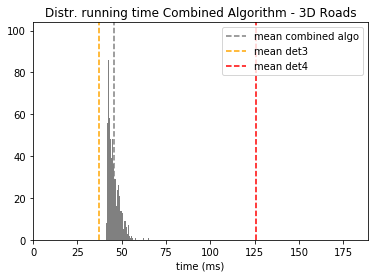

In [23]:
import matplotlib.pyplot as plt

maximum = max(np.mean(time_MT),np.mean(time_FC),np.mean(time_combined))*1.5

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='dashed', color="grey", label="mean combined algo")
# plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
# plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, maximum))

plt.legend()
plt.title('Distr. running time Combined Algorithm - 3D Roads')
plt.xlabel('time (ms)')

# fig.tight_layout()
# plt.savefig('Distrib_running_time_housesales_combined.pdf')#, bbox_inches='tight')
plt.show()